1. For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria

In [46]:
import numpy as np

# Function definition
def J(w):
    return w**2 + 54/w

# Derivative of the function
def J_prime(w):
    return 2*w - 54/(w**2)

# Second derivative of the function
def J_double_prime(w):
    return 2 + 108/(w**3)

# Interval Halving Method
def interval_halving_method(a, b, epsilon):
    while abs(b - a) > epsilon:
        mid = (a + b) / 2
        if J_prime(mid) == 0:
            return mid
        if J_prime(a) * J_prime(mid) < 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2

# Newton-Raphson Method
def newton_raphson_method(initial_guess, epsilon, max_iterations):
    w = initial_guess
    iterations = 0
    while abs(J_prime(w)) > epsilon and iterations < max_iterations:
        w = w - J_prime(w) / J_double_prime(w)
        iterations += 1
    return w

# Bracketed value 
a = 2
b = 3

# Interval Halving Method
critical_point_interval_halving = interval_halving_method(a, b, epsilon=1e-6)
print("Critical point using Interval halving method:", critical_point_interval_halving)

# Newton-Raphson Method
initial_guess_newton_raphson = 2.5
critical_point_newton_raphson = newton_raphson_method(initial_guess_newton_raphson, epsilon=1e-6, max_iterations=1000)
print("Critical point using Newton-Raphson method:", critical_point_newton_raphson)




Critical point using Interval halving method: 2.999999523162842
Critical point using Newton-Raphson method: 2.9999999999975517


2. Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generate the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

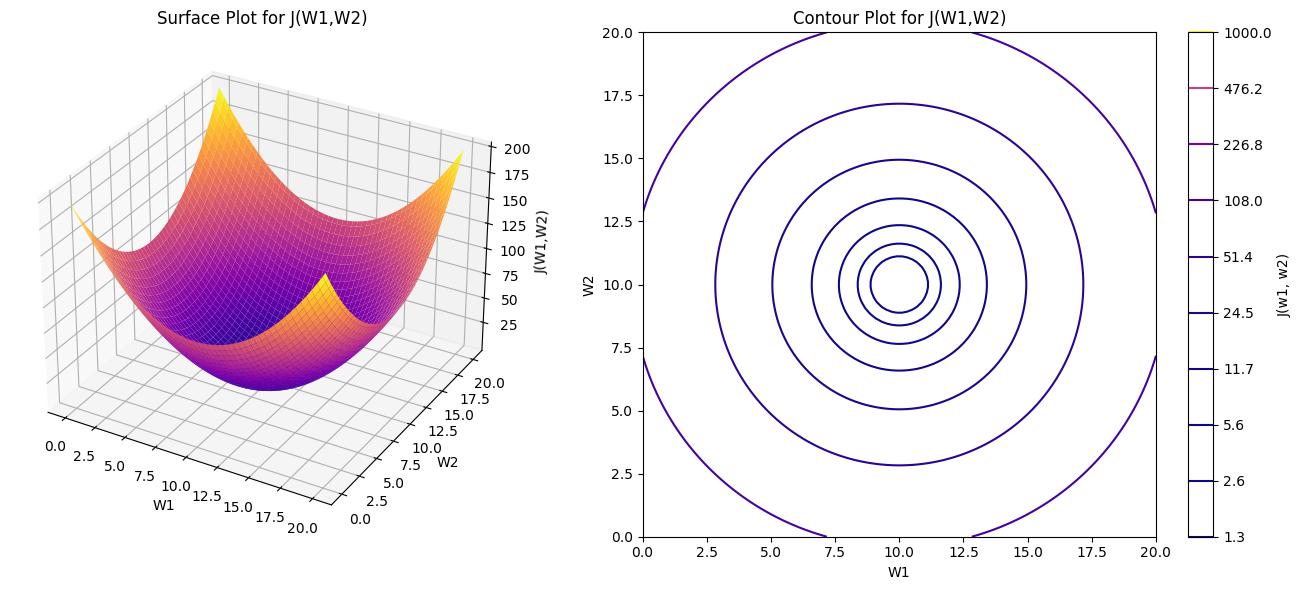

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

def J(w1,w2):
    return (w1-10)**2 + (w2-10)**2

w1=np.linspace(0,20,100)
w2=np.linspace(0,20,100)
W1,W2=np.meshgrid(w1,w2)
W=J(W1,W2)

#surface plot
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(121,projection="3d")
ax1.plot_surface(W1,W2,W,cmap="plasma")
ax1.set_xlabel("W1")
ax1.set_ylabel("W2")
ax1.set_zlabel("J(W1,W2)")
ax1.set_title("Surface Plot for J(W1,W2)")

#contour plot
cont=np.logspace(0.1,3,10)
ax2=fig.add_subplot(122)
contour = ax2.contour(W1,W2,W, levels=cont,cmap="plasma")
ax2.set_xlabel("W1")
ax2.set_ylabel("W2")
ax2.set_title("Contour Plot for J(W1,W2)")
plt.colorbar(contour, ax=ax2, label="J(w1, w2)")
plt.tight_layout()

plt.show()



    


3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.

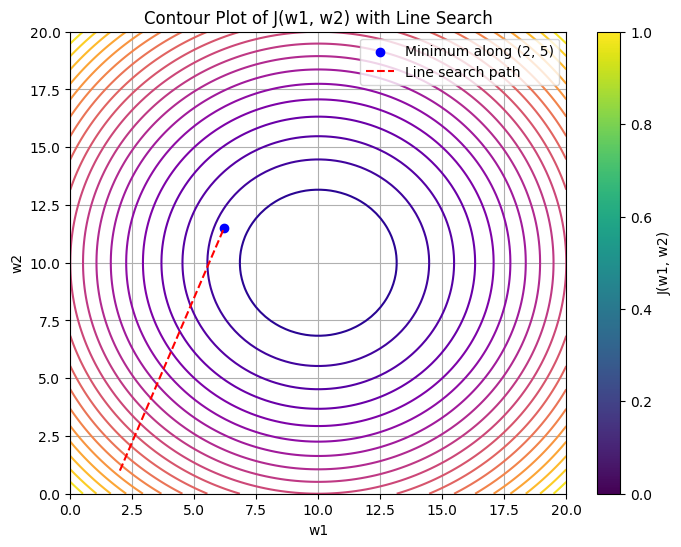

Minimum value found along the direction (2, 5): 16.68999999999997
Minimum point: [ 6.2 11.5]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

direction = np.array([2, 5]) #direction
start_point = np.array([2, 1])#start point

# Performing Line search
def line_search(f, direction, start_point, step_size=0.1, tolerance=1e-6, max_iterations=1000):
    current_point = start_point
    iterations = 0
    while iterations < max_iterations:
        next_point = current_point + step_size * direction
        if f(*next_point) >= f(*current_point):
            break
        current_point = next_point
        iterations += 1
    return current_point

#line search along the given direction
min_point = line_search(J, direction, start_point)

# Generate data for contour plot
w1 = np.linspace(0, 20, 100)
w2 = np.linspace(0, 20, 100)
w1, w2 = np.meshgrid(w1, w2)
J_vals = J(w1, w2)

# Plot the function and its contours
plt.figure(figsize=(8, 6))
plt.contour(w1, w2, J_vals, levels=20, cmap='plasma')
plt.scatter(min_point[0], min_point[1], color='blue', label='Minimum along (2, 5)')
plt.plot([start_point[0], min_point[0]], [start_point[1], min_point[1]], color='red', linestyle='--', label='Line search path')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2) with Line Search')
plt.legend()
plt.colorbar(label='J(w1, w2)')
plt.grid(True)
plt.show()

print("Minimum value found along the direction (2, 5):", J(*min_point))
print("Minimum point:", min_point)


In [39]:
import numpy as np

def f(x):
    return 3*x**2 + 2*x

def first_derivative_central_difference(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative_central_difference(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

# central difference method
x_value = 2.0  # Point at which derivatives are evaluated
first_derivative = first_derivative_central_difference(f, x_value)
second_derivative = second_derivative_central_difference(f, x_value)

print("First order derivative at x =", x_value, ":", first_derivative)
print("Second order derivative at x =", x_value, ":", second_derivative)


First order derivative at x = 2.0 : 14.000000000002897
Second order derivative at x = 2.0 : 6.000000496442225
